In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Define the environment
grid_size = 10
goal_position = (9, 9)
start_position = (0, 0)
obstacles = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]

In [3]:
# Q-learning parameters
alpha = 0.1       # Learning rate
gamma = 0.9       # Discount factor
epsilon = 0.1     # Exploration rate
num_episodes = 500

In [4]:
# Q-table initialization
Q_table = np.zeros((grid_size, grid_size, 4)) # 4 possible actions: up, down, left, right


In [5]:
# Define actions
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

In [6]:
# Function to take a step in the grid
def step(state, action):
    row, col = state
    move = actions[action]
    next_state = (max(0, min(row + move[0], grid_size - 1)),
                  max(0, min(col + move[1], grid_size - 1)))
    
    # Check if next state is an obstacle
    if next_state in obstacles:
        return state, -1  # penalty for hitting an obstacle
    elif next_state == goal_position:
        return next_state, 10  # reward for reaching goal
    else:
        return next_state, -0.1  # small penalty for each step


In [7]:
# Training
for episode in range(num_episodes):
    state = start_position
    done = False

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)  # explore
        else:
            action = np.argmax(Q_table[state[0], state[1]])  # exploit

        # Take action and observe result
        next_state, reward = step(state, action)
        
        # Update Q-value
        best_next_action = np.argmax(Q_table[next_state[0], next_state[1]])
        Q_table[state[0], state[1], action] = Q_table[state[0], state[1], action] + \
            alpha * (reward + gamma * Q_table[next_state[0], next_state[1], best_next_action] - 
                     Q_table[state[0], state[1], action])

        state = next_state

        # Check if goal is reached
        if state == goal_position:
            done = True


In [8]:
# Display optimal path after training
state = start_position
optimal_path = [state]

while state != goal_position:
    action = np.argmax(Q_table[state[0], state[1]])
    state, _ = step(state, action)
    optimal_path.append(state)

print("Optimal path from start to goal:", optimal_path)


Optimal path from start to goal: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


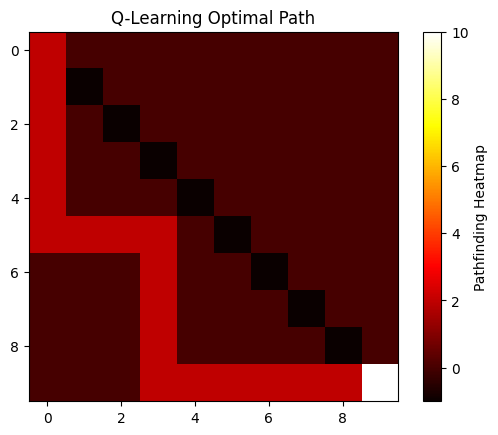

In [9]:
# Visualize the path
grid = np.zeros((grid_size, grid_size))
for (r, c) in obstacles:
    grid[r, c] = -1
for (r, c) in optimal_path:
    grid[r, c] = 2
grid[goal_position] = 10

plt.imshow(grid, cmap="hot", interpolation="nearest")
plt.colorbar(label="Pathfinding Heatmap")
plt.title("Q-Learning Optimal Path")
plt.show()